# 2.4 Random Forest models with ClimateWins data -> Hyperparameter Optomized

-single city, Ljubljana// all years

## Contents:

### 1. Importing Libraries and Data
- loading cleaned wx observations from 2.2, and pleasant_wx

### 2. Data Wrangling
- this version includes only Ljubljana, all years
- split into training and test sets

## 3. Optomization Search

### 4. Running Random Forest with Optomized search parameters

In [22]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
import time
from numpy import argmax
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

In [2]:
# Setting Path 

path = r'/Users/jeremyobach/Documents/Data Analytics/CareerFoundry/Specialization - Machine Learning/Real World Applications of Machine Learning/ML Achievement 2 MASTER FOLDER'
#checking path set correctly
path

'/Users/jeremyobach/Documents/Data Analytics/CareerFoundry/Specialization - Machine Learning/Real World Applications of Machine Learning/ML Achievement 2 MASTER FOLDER'

In [3]:
# delimiting columns displayed
pd.options.display.max_columns = None

In [4]:
pleasant = pd.read_csv (os.path.join(path, '02 Data', 'pleasant_wx_predictions.csv'), index_col = False)

In [5]:
X = pd.read_pickle(os.path.join(path, '02 Data', 'X_cleaned.pkl'))

In [6]:
pleasant.shape

(22950, 16)

In [7]:
X.shape

(22950, 135)

In [10]:
X.head()

,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_cloud_cover,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_pressure,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,SONNBLICK_cloud_cover,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_humidity,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,7,0.85,1.018,0.32,0.09,0.7,6.5,0.8,10.9,1,0.81,1.0195,0.88,0.00,7.0,3.7,-0.9,7.9,4,0.67,1.017,0.44,0.01,2.3,2.4,-0.4,5.1,7,0.85,1.0032,0.07,0.25,0.0,9.3,7.4,11.0,8,0.83,1.0161,0.12,0.08,0.0,10.0,7.0,11.5,7,0.91,1.0010,0.13,0.22,0.0,10.6,9.4,8.3,8,0.82,1.0094,0.28,0.48,1.6,7.9,3.9,9.4,8,1.00,1.0173,0.20,0.00,0.0,-0.6,-1.9,0.5,7,0.83,1.0063,0.22,0.32,1.0,9.5,8.5,11.1,6,0.92,1.0260,0.53,0.0,1.4,7.6,4.4,10.8,5,0.67,1.0304,0.20,0.10,0.0,6.9,1.1,10.4,8,0.98,0.9978,0.04,1.14,0.0,4.9,3.8,5.9,4,0.73,1.0304,0.48,0.01,2.3,-5.9,-8.5,-3.2,5,0.98,1.0114,0.05,0.32,0.0,4.2,2.2,4.9,5,0.88,1.0003,0.45,0.34,4.7,8.5,6.0,10.9
1,6,0.84,1.018,0.36,1.05,1.1,6.1,3.3,10.1,6,0.84,1.0172,0.25,0.00,0.0,2.9,2.2,4.4,4,0.67,1.017,0.18,0.31,0.0,2.3,1.4,3.1,8,0.90,1.0056,0.14,0.06,0.1,7.7,6.4,8.3,8,0.89,1.0161,0.18,0.66,0.5,8.2,7.4,11.0,7,0.98,1.0051,0.13,0.23,0.0,6.1,3.9,10.6,6,0.86,1.0086,0.12,0.27,0.0,7.7,6.8,9.1,6,0.94,1.0173,0.56,0.13,3.2,2.1,-1.3,5.5,8,0.92,1.0062,0.17,1.34,0.4,8.6,7.5,9.9,7,0.86,1.0254,0.46,0.0,0.9,9.8,7.4,12.2,6,0.72,1.0292,0.61,0.30,5.1,6.2,4.2,10.2,8,0.62,1.0139,0.04,0.00,0.0,3.4,2.8,4.9,6,0.97,1.0292,0.21,0.61,0.0,-9.5,-10.5,-8.5,5,0.62,1.0114,0.05,0.06,0.0,4.0,3.0,5.0,7,0.91,1.0007,0.25,0.84,0.7,8.9,5.6,12.1
2,8,0.90,1.018,0.18,0.30,0.0,8.5,5.1,9.9,6,0.77,1.0179,0.67,0.00,3.5,3.1,-0.5,6.4,4,0.67,1.017,0.30,0.00,0.6,2.7,1.7,5.3,6,0.92,1.0165,0.28,0.0

### 2. Data Wrangling
For this notebook version:
- 1 wx station, all years

In [8]:
keep = list(x for x in X.columns if not x.find('LJUBLJANA') >=0)
#Create a list of the data that doesn't contain the weather station name above.
keep.sort()
keep

['BASEL_cloud_cover',
 'BASEL_global_radiation',
 'BASEL_humidity',
 'BASEL_precipitation',
 'BASEL_pressure',
 'BASEL_sunshine',
 'BASEL_temp_max',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BELGRADE_cloud_cover',
 'BELGRADE_global_radiation',
 'BELGRADE_humidity',
 'BELGRADE_precipitation',
 'BELGRADE_pressure',
 'BELGRADE_sunshine',
 'BELGRADE_temp_max',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BUDAPEST_cloud_cover',
 'BUDAPEST_global_radiation',
 'BUDAPEST_humidity',
 'BUDAPEST_precipitation',
 'BUDAPEST_pressure',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_max',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'DEBILT_cloud_cover',
 'DEBILT_global_radiation',
 'DEBILT_humidity',
 'DEBILT_precipitation',
 'DEBILT_pressure',
 'DEBILT_sunshine',
 'DEBILT_temp_max',
 'DEBILT_temp_mean',
 'DEBILT_temp_min',
 'DUSSELDORF_cloud_cover',
 'DUSSELDORF_global_radiation',
 'DUSSELDORF_humidity',
 'DUSSELDORF_precipitation',
 'DUSSELDORF_pressure',
 'DUSSELDORF_sunshine',
 'DUSSELDORF_temp_max',
 

In [9]:
#Create an 'X' matrix by dropping the unneeded columns. One weather station, full time period.
X2 = X.drop(keep, axis=1)
#y = df_keyyear.drop(['DATE'], axis=1)
X2

,LJUBLJANA_cloud_cover,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max
0,8,1.00,1.0173,0.20,0.00,0.0,-0.6,-1.9,0.5
1,6,0.94,1.0173,0.56,0.13,3.2,2.1,-1.3,5.5
2,8,0.96,1.0173,0.20,0.12,0.0,4.6,0.9,6.3
3,6,0.94,1.0173,0.49,0.00,2.2,3.2,1.0,7.0
4,7,0.94,1.0173,0.20,0.00,0.0,3.6,0.4,4.8
...,...,...,...,...,...,...,...,...,...
22945,4,0.80,1.0289,1.35,0.37,5.9,14.7,12.1,21.1
22946,3,0.82,1.0291,1.35,0.37,4.5,12.9,9.8,19.8
22947,3,0.81,1.0270,1.35,0.37,5.1,13.2,10.2,20.7
22948,3,0.77,1.0238,1.35,0.37,5.7,14.0,10.0,23.1


In [10]:
y2 = pleasant['LJUBLJANA_pleasant_weather']
y2

0        0
1        0
2        0
3        0
4        0
        ..
22945    0
22946    0
22947    0
22948    0
22949    0
Name: LJUBLJANA_pleasant_weather, Length: 22950, dtype: int64

In [11]:
X2.shape

(22950, 9)

In [12]:
y2.shape

(22950,)

In [13]:
# turning X2 and y2 from a df to arrays (X and y)

X = np.array(X2)
y = np.array(y2)

In [14]:
# verifying array shape

X

array([[ 8.    ,  1.    ,  1.0173, ..., -0.6   , -1.9   ,  0.5   ],
       [ 6.    ,  0.94  ,  1.0173, ...,  2.1   , -1.3   ,  5.5   ],
       [ 8.    ,  0.96  ,  1.0173, ...,  4.6   ,  0.9   ,  6.3   ],
       ...,
       [ 3.    ,  0.81  ,  1.027 , ..., 13.2   , 10.2   , 20.7   ],
       [ 3.    ,  0.77  ,  1.0238, ..., 14.    , 10.    , 23.1   ],
       [ 3.    ,  0.77  ,  1.0114, ..., 13.6   ,  8.8   , 23.4   ]])

In [15]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [16]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.20, random_state = 38)

In [17]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(18360, 9) (18360,)
(4590, 9) (4590,)


In [18]:
y_train

array([1, 0, 0, ..., 0, 1, 0])

In [27]:
X_train

array([[ 2.    ,  0.82  ,  1.0229, ..., 12.5   ,  6.4   , 20.1   ],
       [ 2.    ,  0.62  ,  1.0108, ..., 18.3   ,  8.6   , 24.5   ],
       [ 8.    ,  0.85  ,  1.0167, ...,  5.    ,  1.3   ,  9.3   ],
       ...,
       [ 8.    ,  0.87  ,  1.0111, ...,  0.4   , -0.7   ,  2.7   ],
       [ 3.    ,  0.75  ,  1.0261, ..., 12.3   ,  5.6   , 19.6   ],
       [ 2.    ,  0.63  ,  1.016 , ..., 10.3   ,  2.2   , 17.    ]])

In [28]:
X_test

array([[ 8.    ,  0.93  ,  1.0092, ..., -1.5   , -6.6   ,  1.    ],
       [ 8.    ,  0.87  ,  1.0161, ...,  9.1   ,  7.    , 16.1   ],
       [ 8.    ,  0.9   ,  1.0127, ..., 11.6   ,  8.2   , 18.    ],
       ...,
       [ 7.    ,  0.91  ,  1.0174, ...,  7.4   ,  6.8   , 15.1   ],
       [ 2.    ,  0.51  ,  1.0156, ..., 21.3   , 11.5   , 27.8   ],
       [ 8.    ,  0.87  ,  1.0119, ...,  9.3   ,  6.6   , 11.1   ]])

In [29]:
y_test

array([0, 0, 0, ..., 0, 1, 0])

## 3.  Hyperparameter Optimization 

- Grid Search
- Random Search

In [19]:
# creating a RF classifier
clf = RandomForestClassifier()

In [25]:
# Grid search cv
grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200],
              'max_features':[1,3,5,7],
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[1,2,3]
           }

In [26]:
start = time.time()
grid = GridSearchCV(clf,param_grid=grid_space,cv=3,scoring='accuracy', verbose=3, n_jobs=-1)
model_grid = grid.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
432 fits failed out of a total of 1296.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
432 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_

Search took 1.1942755699157714 minutes


In [27]:
# grid search results
print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

Best GRID search hyperparameters are: {'max_depth': 3, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best GRID search score is: 1.0


In [28]:
# Random search cv
rs_space={'max_depth':list(np.arange(10, 100, step=10)) + [None],
              'n_estimators':np.arange(10, 500, step=50),
              'max_features':randint(1,7),
              'criterion':['gini','entropy'],
              'min_samples_leaf':randint(1,4),
              'min_samples_split':np.arange(2, 10, step=2)
         }

[CV 1/3] END .....max_depth=3, n_estimators=100;, score=0.998 total time=   0.5s
[CV 2/3] END .....max_depth=5, n_estimators=200;, score=1.000 total time=   1.1s
[CV 3/3] END ...max_depth=None, n_estimators=10;, score=1.000 total time=   0.1s
[CV 1/3] END ..max_depth=None, n_estimators=200;, score=1.000 total time=   1.1s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.957 total time=   0.7s
[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.959 total time=   0.7s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=3, n_estimators=10;, score=0.982 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=3, min_samples_split=3, n_estimators=10;, score=0.991 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=3, min_samples_split=3, n_estimators=10;, score=0.980 total time=   0.0s
[CV 3/3] END m

[CV 1/3] END .....max_depth=3, n_estimators=200;, score=0.999 total time=   1.0s
[CV 1/3] END ....max_depth=10, n_estimators=200;, score=1.000 total time=   1.3s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.955 total time=   0.3s
[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=200;, score=0.963 total time=   0.7s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=3, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=3, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=1, min_sampl

[CV 2/3] END .....max_depth=3, n_estimators=200;, score=0.999 total time=   1.0s
[CV 3/3] END ....max_depth=10, n_estimators=100;, score=1.000 total time=   0.7s
[CV 3/3] END ..max_depth=None, n_estimators=100;, score=1.000 total time=   0.7s
[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.962 total time=   0.3s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=1, n_estimators=100;, s

[CV 2/3] END ......max_depth=3, n_estimators=10;, score=0.997 total time=   0.1s
[CV 2/3] END ......max_depth=5, n_estimators=10;, score=1.000 total time=   0.1s
[CV 1/3] END .....max_depth=5, n_estimators=100;, score=1.000 total time=   0.6s
[CV 3/3] END .....max_depth=5, n_estimators=200;, score=0.999 total time=   1.2s
[CV 2/3] END ..max_depth=None, n_estimators=200;, score=1.000 total time=   1.1s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=200;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.954 total time=   0.7s
[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samp

[CV 3/3] END .....max_depth=3, n_estimators=100;, score=0.998 total time=   0.5s
[CV 3/3] END .....max_depth=5, n_estimators=100;, score=1.000 total time=   0.6s
[CV 2/3] END ....max_depth=10, n_estimators=200;, score=1.000 total time=   1.3s
[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.902 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=10;, score=0.933 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=10;, score=0.969 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=200;, score=0.954 total time=   0.7s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=2

In [29]:
# creating a RF classifier
clf2= RandomForestClassifier()

In [31]:
start = time.time()
rf_random = RandomizedSearchCV(clf2, rs_space, n_iter=200, scoring='accuracy', verbose=3, n_jobs=-1, cv=3) #500
model_random = rf_random.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 200 candidates, totalling 600 fits
Search took 2.04145583709081 minutes


In [32]:
# random random search results
print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best RANDOM search hyperparameters are: {'criterion': 'gini', 'max_depth': 20, 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 160}
Best RANDOM search score is: 1.0
[CV 2/3] END criterion=gini, max_depth=20, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=160;, score=0.999 total time=   0.8s
[CV 3/3] END criterion=gini, max_depth=90, max_features=3, min_samples_leaf=2, min_samples_split=6, n_estimators=210;, score=1.000 total time=   1.4s
[CV 2/3] END criterion=gini, max_depth=50, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=210;, score=0.999 total time=   1.1s
[CV 1/3] END criterion=gini, max_depth=80, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=60;, score=1.000 total time=   0.4s
[CV 2/3] END criterion=gini, max_depth=80, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=60;, score=1.000 total time=   0.5s
[CV 2/3] END criterion=gini, max_depth=20, max_featur

[CV 1/3] END criterion=gini, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=210;, score=1.000 total time=   1.3s
[CV 3/3] END criterion=gini, max_depth=90, max_features=3, min_samples_leaf=2, min_samples_split=4, n_estimators=460;, score=1.000 total time=   3.0s
[CV 3/3] END criterion=gini, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=360;, score=1.000 total time=   2.4s
[CV 1/3] END criterion=entropy, max_depth=30, max_features=4, min_samples_leaf=3, min_samples_split=8, n_estimators=10;, score=1.000 total time=   0.1s
[CV 2/3] END criterion=entropy, max_depth=30, max_features=4, min_samples_leaf=3, min_samples_split=8, n_estimators=10;, score=1.000 total time=   0.1s
[CV 3/3] END criterion=entropy, max_depth=30, max_features=4, min_samples_leaf=3, min_samples_split=8, n_estimators=10;, score=1.000 total time=   0.1s
[CV 2/3] END criterion=gini, max_depth=None, max_features=2, min_samples_leaf=2, min_samples_s

[CV 1/3] END criterion=entropy, max_depth=None, max_features=6, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=1.000 total time=   0.1s
[CV 3/3] END criterion=gini, max_depth=20, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=160;, score=0.999 total time=   0.9s
[CV 2/3] END criterion=gini, max_depth=90, max_features=3, min_samples_leaf=2, min_samples_split=4, n_estimators=460;, score=1.000 total time=   3.0s
[CV 1/3] END criterion=gini, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=360;, score=1.000 total time=   2.4s
[CV 2/3] END criterion=entropy, max_depth=50, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=310;, score=1.000 total time=   1.9s
[CV 2/3] END criterion=entropy, max_depth=20, max_features=4, min_samples_leaf=2, min_samples_split=4, n_estimators=60;, score=1.000 total time=   0.4s
[CV 1/3] END criterion=gini, max_depth=10, max_features=1, min_samples_leaf=3, min_samples_

[CV 2/3] END criterion=entropy, max_depth=None, max_features=6, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=1.000 total time=   0.1s
[CV 2/3] END criterion=gini, max_depth=90, max_features=3, min_samples_leaf=2, min_samples_split=6, n_estimators=210;, score=1.000 total time=   1.3s
[CV 3/3] END criterion=gini, max_depth=70, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=60;, score=1.000 total time=   0.5s
[CV 1/3] END criterion=gini, max_depth=50, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=210;, score=0.998 total time=   1.1s
[CV 3/3] END criterion=gini, max_depth=50, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=210;, score=0.999 total time=   1.2s
[CV 1/3] END criterion=gini, max_depth=20, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=160;, score=1.000 total time=   1.2s
[CV 1/3] END criterion=gini, max_depth=70, max_features=4, min_samples_leaf=2, min_samples_split=

### 4. Random Forest Model

In [53]:
# creating a RF classifier
clf = RandomForestClassifier(criterion = 'gini', max_depth = 20, max_features = 5, min_samples_leaf = 1, 
                             min_samples_split= 2, n_estimators= 160)
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, max_features=5, n_estimators=160)

In [54]:
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
  
# using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  1.0


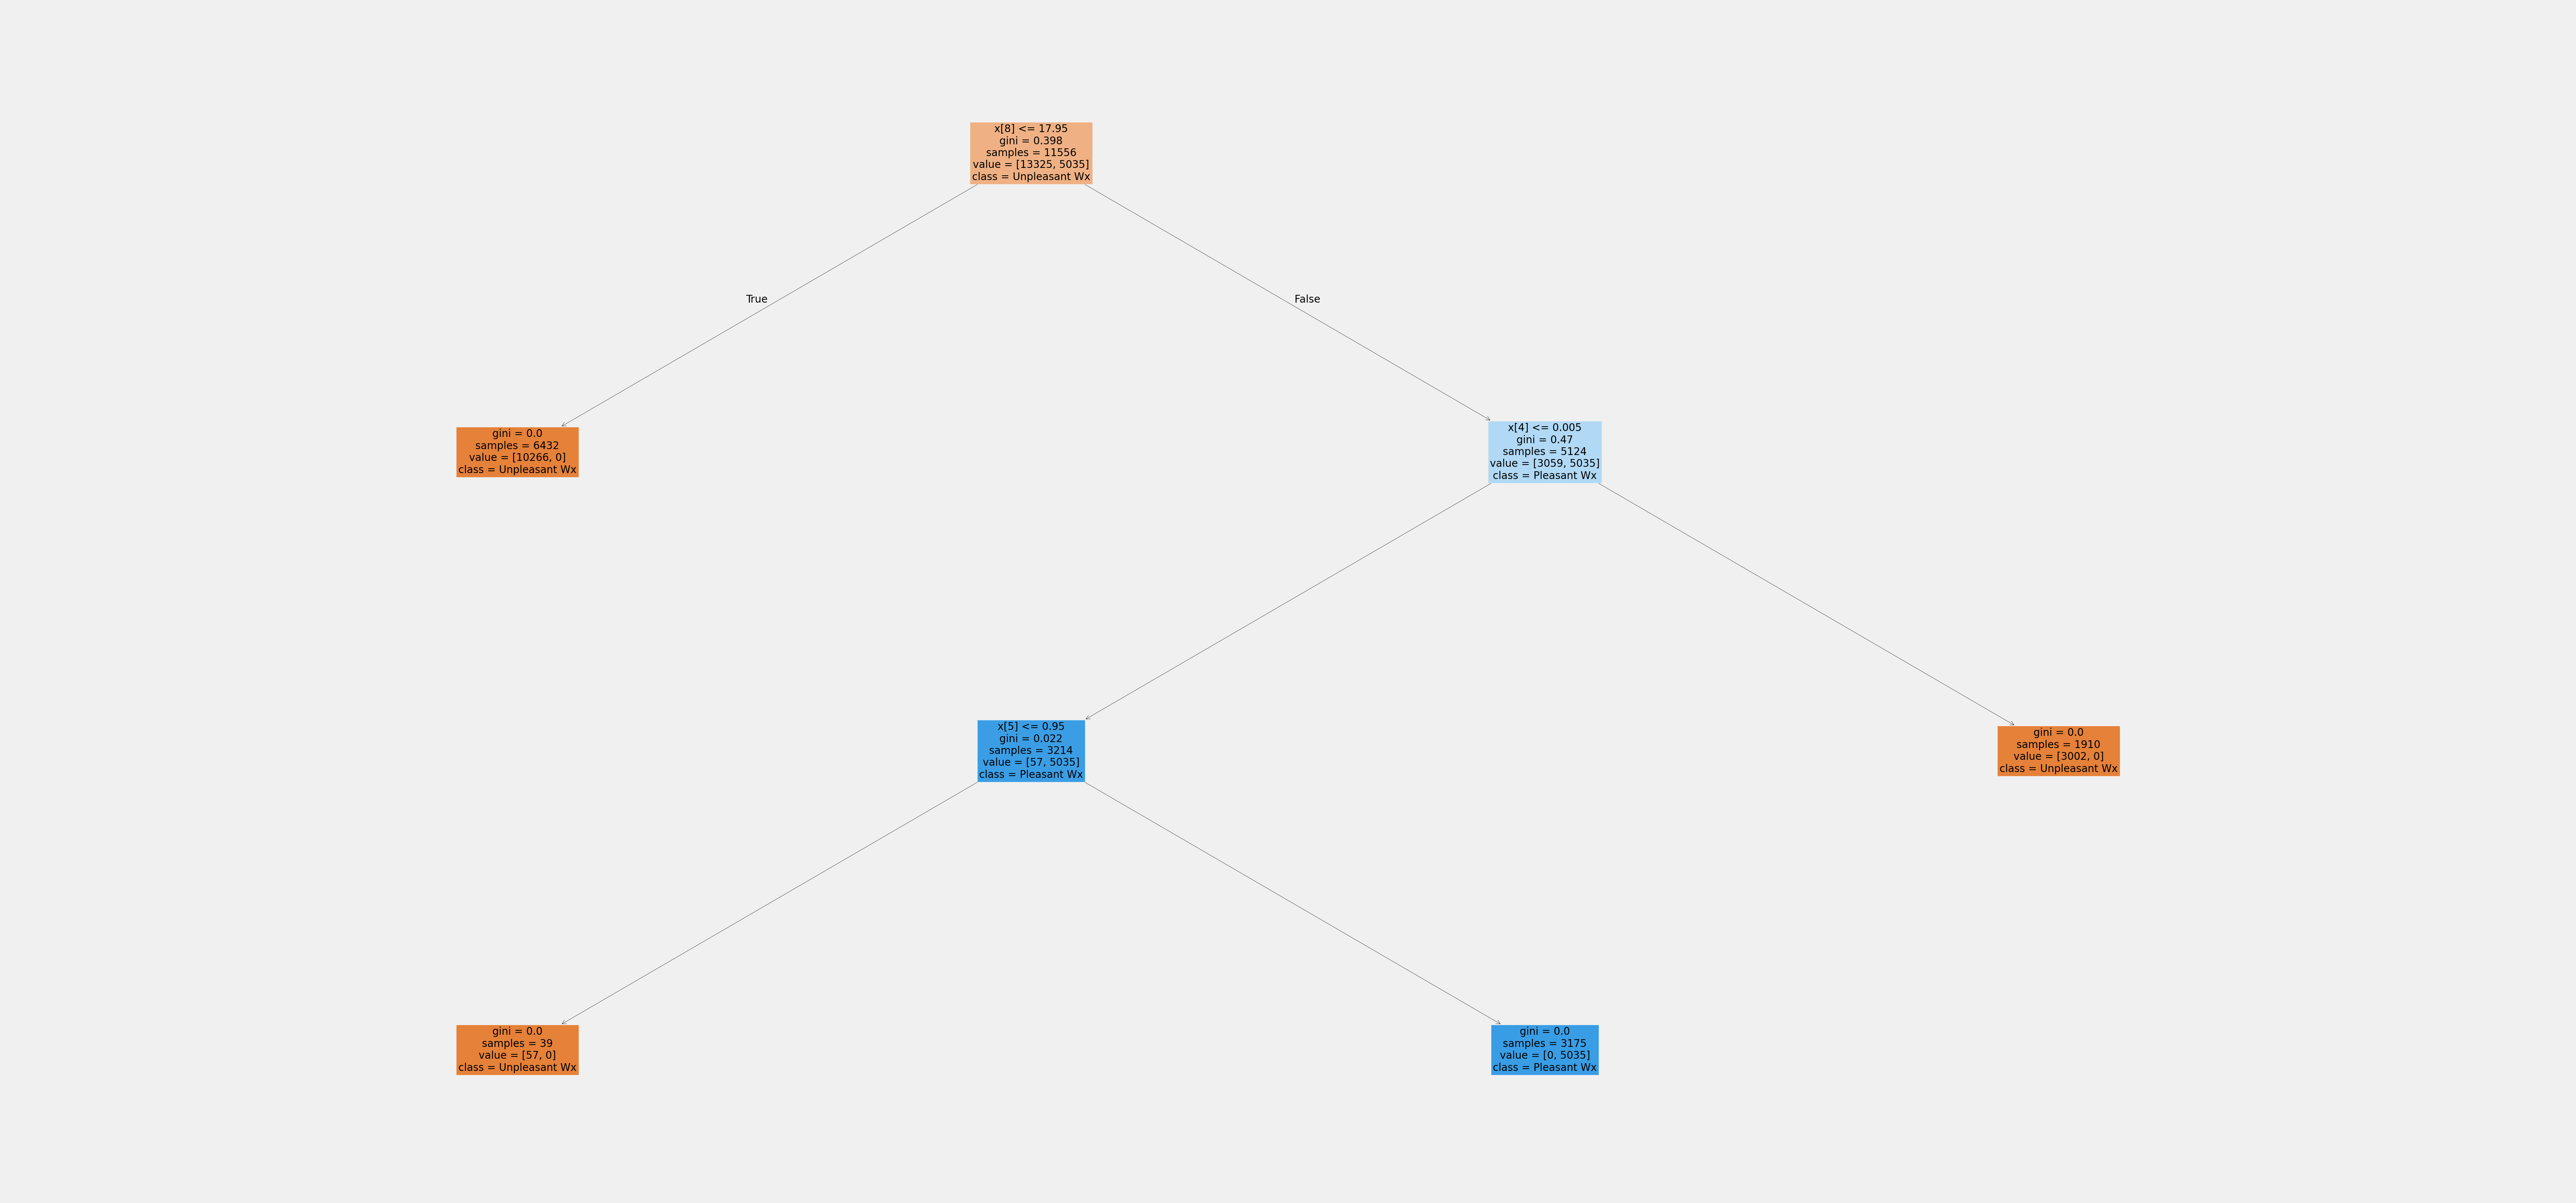

In [55]:
types = {0:'Unpleasant Wx', 1:'Pleasant Wx'}

fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[5], fontsize = 20, class_names=types, filled=True);

### 4. Relative importance of Factors

In [56]:
np.set_printoptions(threshold=np.inf)
newarray = clf.feature_importances_
#print(clf.feature_importances_.shape)
newarray

array([0.04004215, 0.00413297, 0.0033822 , 0.10017704, 0.41080737,
       0.07120947, 0.0658899 , 0.00330473, 0.30105418])

In [57]:
np.set_printoptions(threshold=1000)

In [58]:
station1 = list(x for x in X2.columns if x.find('LJUBLJANA') >=0)
#Basel.sort()
station1

['LJUBLJANA_cloud_cover',
 'LJUBLJANA_humidity',
 'LJUBLJANA_pressure',
 'LJUBLJANA_global_radiation',
 'LJUBLJANA_precipitation',
 'LJUBLJANA_sunshine',
 'LJUBLJANA_temp_mean',
 'LJUBLJANA_temp_min',
 'LJUBLJANA_temp_max']

In [59]:
newarray = pd.Series(newarray, index = station1) #.sort_values(ascending = False)
newarray

LJUBLJANA_cloud_cover         0.040042
LJUBLJANA_humidity            0.004133
LJUBLJANA_pressure            0.003382
LJUBLJANA_global_radiation    0.100177
LJUBLJANA_precipitation       0.410807
LJUBLJANA_sunshine            0.071209
LJUBLJANA_temp_mean           0.065890
LJUBLJANA_temp_min            0.003305
LJUBLJANA_temp_max            0.301054
dtype: float64

['LJUBLJANA_cloud_cover', 'LJUBLJANA_humidity', 'LJUBLJANA_pressure', 'LJUBLJANA_global_radiation', 'LJUBLJANA_precipitation', 'LJUBLJANA_sunshine', 'LJUBLJANA_temp_mean', 'LJUBLJANA_temp_min', 'LJUBLJANA_temp_max']


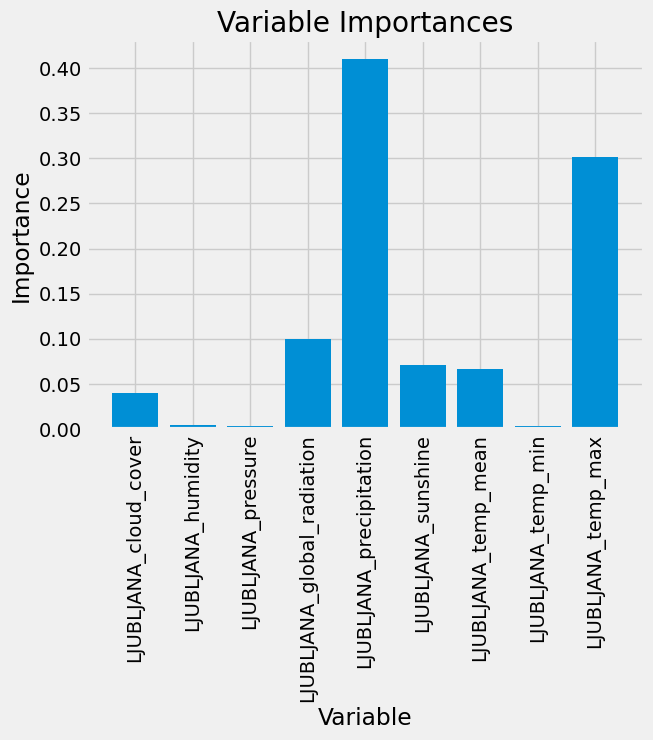

In [60]:
%matplotlib inline

plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(newarray)))
print(station1)

plt.bar(x_values, newarray, orientation = 'vertical')
plt.xticks(x_values, station1, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');